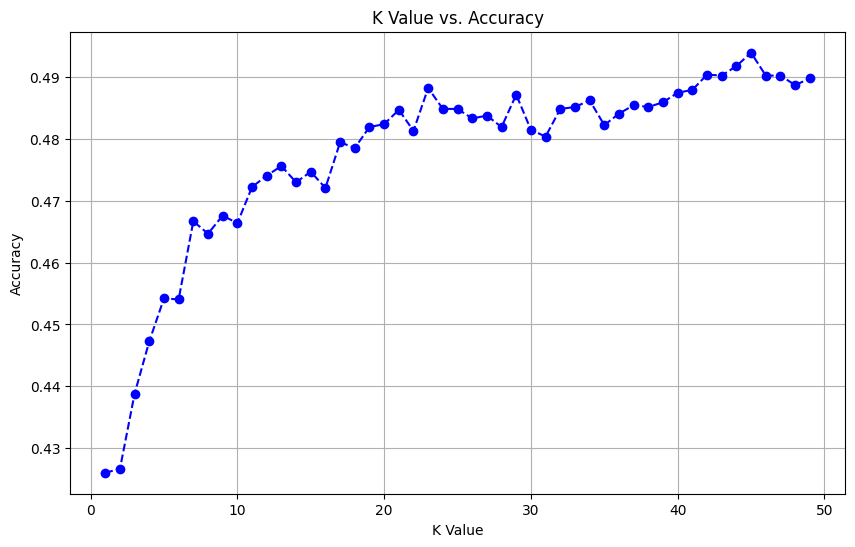

Best K for KNN: 45
Accuracy: 0.55


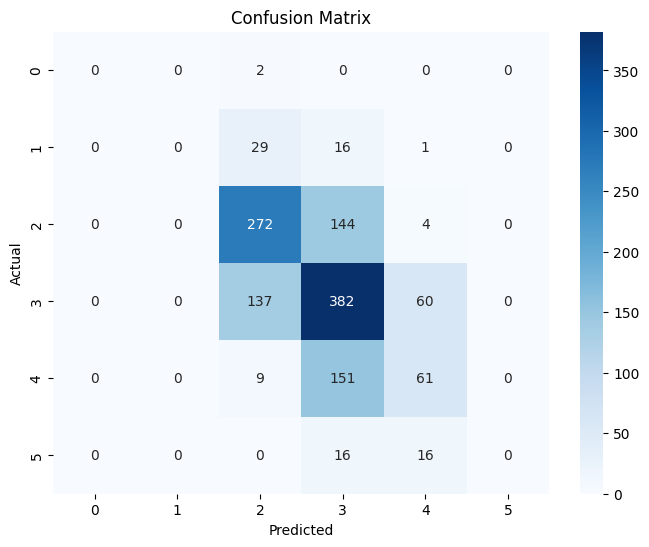

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the wine dataset
wine_data = pd.read_csv('wine.csv')

# Drop unwanted attributes
unwanted_attributes = ['type']
wine_data = wine_data.drop(unwanted_attributes, axis=1)

# Split the data into feature matrix X and target variable y
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Apply standard scaling to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
best_accuracy = 0
best_k = 0
accuracy_list = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_imputed, y, cv=5)  # 5-fold cross-validation
    avg_accuracy = scores.mean()
    accuracy_list.append(avg_accuracy)
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k

# Create a line plot to visualize K values vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), accuracy_list, marker='o', linestyle='--', color='b')
plt.title('K Value vs. Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best K for KNN:", best_k)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the wine dataset
wine_data = pd.read_csv('wine.csv')


In [3]:
# Drop unwanted attributes
unwanted_attributes = ['type']
wine_data = wine_data.drop(unwanted_attributes, axis=1)

# Split the data into feature matrix X and target variable y
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']


In [4]:
# Apply standard scaling to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)


In [6]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [7]:
# Hyperparameter tuning
best_accuracy = 0
best_k = 0
accuracy_list = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_imputed, y, cv=5)  # 5-fold cross-validation
    avg_accuracy = scores.mean()
    accuracy_list.append(avg_accuracy)
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_k = k


In [8]:
# Train the best KNN model
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the model
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best K for KNN:", best_k)
print("Accuracy:", accuracy)


Best K for KNN: 45
Accuracy: 0.55


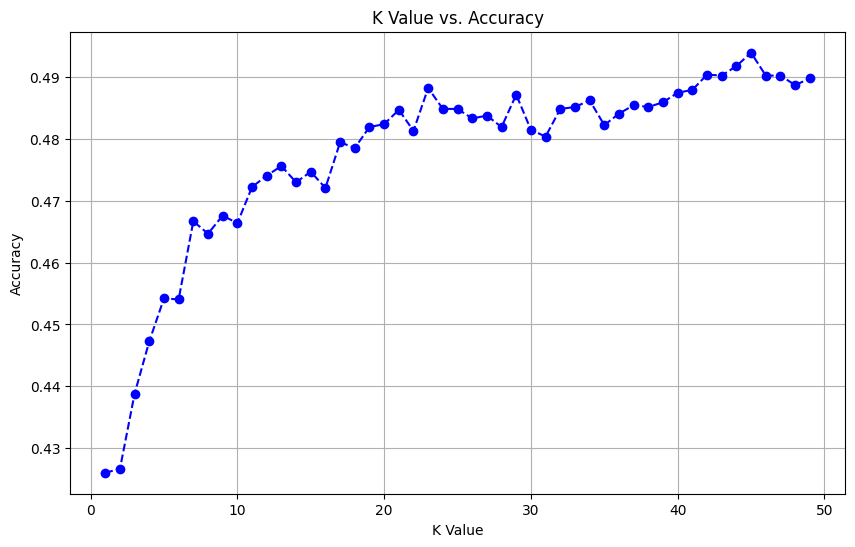

In [9]:
# Create a line plot to visualize K values vs. Accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), accuracy_list, marker='o', linestyle='--', color='b')
plt.title('K Value vs. Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

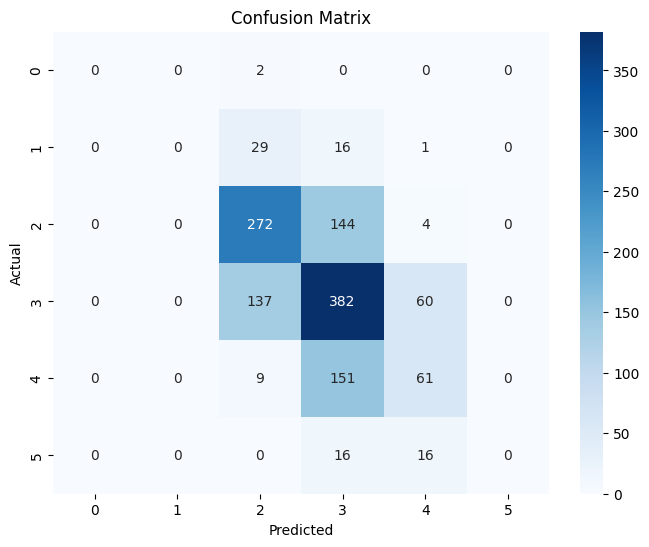

In [10]:
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()